In [1]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io

In [2]:
uploaded = files.upload()
df_EjemploTablaFrecuencias=pd.read_excel(io.BytesIO(uploaded['EjemploTablaFrecuencias.xlsx']))

Saving EjemploTablaFrecuencias.xlsx to EjemploTablaFrecuencias.xlsx


In [3]:
#Leemos los datos
df_EjemploTablaFrecuencias

,Empleado,Respuestas
0,1,Adecuado
1,2,No existe un lugar
2,3,Inadecuado
3,4,No existe un lugar
4,5,No existe un lugar
...,...,...
111,112,Adecuado
112,113,Adecuado
113,114,Adecuado
114,115,Adecuado


In [4]:
#Hacemos el conteo de las respuestas
frec=pd.value_counts(df_EjemploTablaFrecuencias["Respuestas"])
frec

Adecuado                 82
Medianamente adecuado    16
Inadecuado               10
No existe un lugar        8
Name: Respuestas, dtype: int64

In [5]:
frec_df=pd.DataFrame(frec)
#Asignamos el nombre frec_abs a la columna
frec_df.columns=["frec_abs"]
frec_df

,frec_abs
Adecuado,82
Medianamente adecuado,16
Inadecuado,10
No existe un lugar,8


In [6]:
#Calculamos la frecuencia relativa
frec_df["frec_rel"]=100*frec_df["frec_abs"]/len(df_EjemploTablaFrecuencias)
frec_df

,frec_abs,frec_rel
Adecuado,82,70.689655
Medianamente adecuado,16,13.793103
Inadecuado,10,8.620690
No existe un lugar,8,6.896552


In [7]:
#Obtenemos los valores de las frecuencias absolutas
frec_abs_val=frec_df["frec_abs"].values
frec_abs_val
#Creamos una lista vacía en donde registraremos las frecuencias absolutas acumuladas
acum=[]
#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum=0
#Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in frec_abs_val:
  valor_acum=valor_acum + i
  acum.append(valor_acum)
frec_df["frec_abs_acum"]=acum
frec_df

,frec_abs,frec_rel,frec_abs_acum
Adecuado,82,70.689655,82
Medianamente adecuado,16,13.793103,98
Inadecuado,10,8.620690,108
No existe un lugar,8,6.896552,116


In [8]:
#Obtenemos los valores de las frecuencias relativas
frec_rel_val=frec_df["frec_rel"].values
frec_rel_val
#Creamos una lista vacía en donde registraremos las frecuencias relativas acumuladas
acum=[]
#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum=0
#Recorremos la lista de las frecuencias relativas para irlas sumando
for i in frec_rel_val:
  valor_acum=valor_acum + i
  acum.append(valor_acum)
frec_df["frec_rel_%_acum"]=acum
frec_df

,frec_abs,frec_rel,frec_abs_acum,frec_rel_%_acum
Adecuado,82,70.689655,82,70.689655
Medianamente adecuado,16,13.793103,98,84.482759
Inadecuado,10,8.620690,108,93.103448
No existe un lugar,8,6.896552,116,100.000000


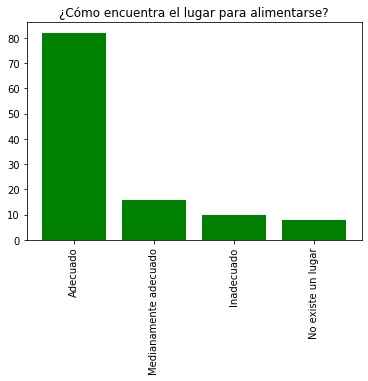

In [9]:
#Indicamos que utilizaremos un solo gráfico
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
#Asignamos un título al gráfico
ax.set_title('¿Cómo encuentra el lugar para alimentarse?')
#Creamos una gráfica de barras con las frecuencias absolutas
ax.bar(frec_df.index, frec_df["frec_abs"], color="g")
#Rotamos las etiquetas del eje X
ax.set_xticklabels(frec_df.index, rotation=90)
plt.show()
